In [1]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs

In [18]:
otp = '16620193411099710310'
df = fs.fn_single(otp=otp, symbol='JPM', window='T')
df.tail(3)

,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,Shares,Cash & Equivalents,Current Assets,...,Long Term Debt,Long Term Liabilities,Total Liabilities,Shareholders Equity,Depreciation,Operating Cash Flow,Investing cash flow,Dividends,Financing cash flow,Price
2021-12-31,"121,678,000,000.00","5,553,000,000.00","121,649,000,000.00","62,087,000,000.00","59,562,000,000.00","46,503,000,000.00",15.36,"2,977,000,000.00","1,436,107,000,000.00","2,600,005,000,000.00",...,"295,735,000,000.00","311,755,000,000.00","3,449,440,000,000.00","294,127,000,000.00","7,932,000,000.00","-13,663,000,000.00","-37,597,000,000.00","-12,858,000,000.00","275,993,000,000.00",158.35
2022-03-31,"119,731,000,000.00","5,795,000,000.00","120,100,000,000.00","68,172,000,000.00","51,928,000,000.00","40,497,000,000.00",13.48,"2,977,000,000.00","1,567,935,000,000.00","2,776,235,000,000.00",...,"311,732,000,000.00","303,383,000,000.00","3,671,146,000,000.00","285,899,000,000.00","7,682,000,000.00","89,188,000,000.00","-226,492,000,000.00","-13,095,000,000.00","189,854,000,000.00",136.32
2022-06-30,"121,025,000,000.00","7,960,000,000.00","120,336,000,000.00","72,640,000,000.00","47,696,000,000.00","37,196,000,000.00",12.46,"2,962,000,000.00","1,456,993,000,000.00","2,688,840,000,000.00",...,"307,178,000,000.00","298,852,000,000.00","3,555,171,000,000.00","286,143,000,000.00","7,468,000,000.00","88,755,000,000.00","-244,472,000,000.00","-13,318,000,000.00","143,995,000,000.00",112.61


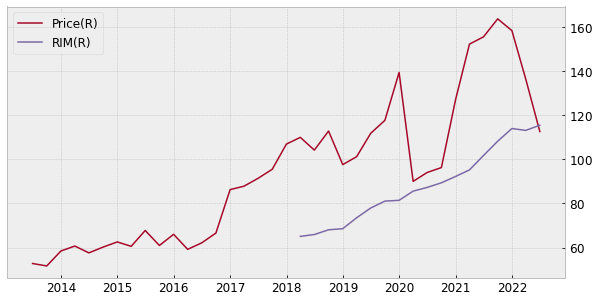

In [19]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['ROE'] = df['Net Income'] / df['Shareholders Equity']
df['ROE3AVG'] = df['ROE'].rolling(20).mean()
df['RIM'] = df['BPS'] * df['ROE3AVG'] / .1
fs.draw_chart(df, right=['Price', 'RIM'])

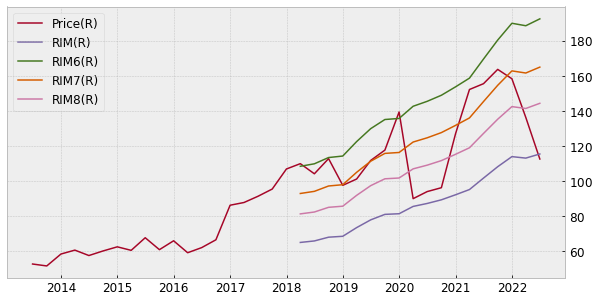

In [20]:
df['RIM6'] = df['BPS'] * df['ROE3AVG'] / .06
df['RIM7'] = df['BPS'] * df['ROE3AVG'] / .07
df['RIM8'] = df['BPS'] * df['ROE3AVG'] / .08
fs.draw_chart(df, right=['Price', 'RIM', 'RIM6', 'RIM7', 'RIM8'])

In [11]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t, study='Y')

2010Q4... For Study. Freezed at the end of July 2021. OK
2011Q1... For Study. Freezed at the end of July 2021. OK
2011Q2... For Study. Freezed at the end of July 2021. OK
2011Q3... For Study. Freezed at the end of July 2021. OK
2011Q4... For Study. Freezed at the end of July 2021. OK
2012Q1... For Study. Freezed at the end of July 2021. OK
2012Q2... For Study. Freezed at the end of July 2021. OK
2012Q3... For Study. Freezed at the end of July 2021. OK
2012Q4... For Study. Freezed at the end of July 2021. OK
2013Q1... For Study. Freezed at the end of July 2021. OK
2013Q2... For Study. Freezed at the end of July 2021. OK
2013Q3... For Study. Freezed at the end of July 2021. OK
2013Q4... For Study. Freezed at the end of July 2021. OK
2014Q1... For Study. Freezed at the end of July 2021. OK
2014Q2... For Study. Freezed at the end of July 2021. OK
2014Q3... For Study. Freezed at the end of July 2021. OK
2014Q4... For Study. Freezed at the end of July 2021. OK
2015Q1... For Study. Freezed at

In [12]:
for t in terms:
    t_1 = fs.quarters_before(terms, t, 4)
    t_2 = fs.quarters_before(terms, t, 8)
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[t_1]['Shareholders Equity'] ) / 2
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['Avg ROE'] = ( data[t]['ROE'] + data[t_1]['ROE'] + data[t_2]['ROE'] ) / 3
    data[t]['RIM'] = data[t]['BPS'] * data[t]['Avg ROE'] / .1
    data[t]['P/RIM'] = data[t]['Price_M3'] / data[t]['RIM']

In [13]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='P/RIM', floor=0, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)

In [14]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 8.40%
Accumulated return: 124.19%
Investment period: 10.0yrs
Sharpe ratio: 0.39
MDD: -48.20%


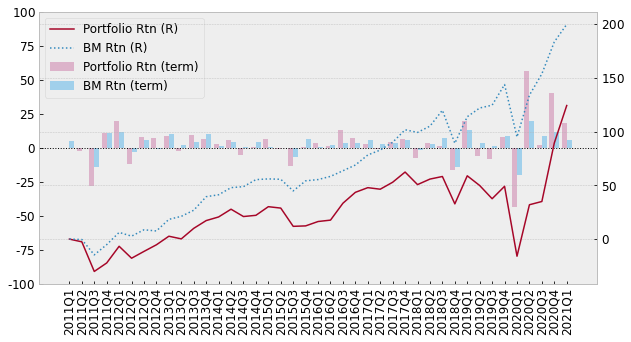

In [15]:
fs.draw_return(df)

In [ ]:
# P/RIM
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    t_1 = fs.quarters_before(terms, t, 4)
    t_2 = fs.quarters_before(terms, t, 8)
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[t_1]['Shareholders Equity'] ) / 2
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['Avg ROE'] = ( data[t]['ROE'] + data[t_1]['ROE'] + data[t_2]['ROE'] ) / 3
    data[t]['RIM'] = data[t]['BPS'] * data[t]['Avg ROE'] / .1
    data[t]['P/RIM'] = data[t]['Price_M3'] / data[t]['RIM']
    s[t] = fs.fn_filter(data[t], by='P/RIM', floor=0, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 8.01%
Accumulated return: 116.18%
Investment period: 10.0yrs
Sharpe ratio: 0.38
MDD: -46.59%
